In [1]:

# Dependencies
import requests
import json
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
from wconfig import apikey
from citipy import citipy

#Output File
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []


# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


647

In [143]:
 #Set up weathermap request
# apikey = ""
lats = []
lngs = []
max_temps = []
humidities = []
cloudiness = []
wind_speeds = []
countries = [] 
dates = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + apikey

weather = []
for city in cities:
#save website information

    try:
        weatherquery_url = url + "&q=" + city.replace(" ","+")

        weather_response = requests.get(weatherquery_url).json()

        print(f'Processing | {city}')
        weather.append(weather_response)
        lats.append(weather_response['coord']['lat'])
        lngs.append(weather_response['coord']['lon'])
        max_temps.append(weather_response['main']['temp_max'])
        humidities.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speeds.append(weather_response['wind']['speed'])
        countries.append(weather_response['sys']['country'])
        dates.append(weather_response['dt'])
    except:
        pass

Processing | huai yot
Processing | buala
Processing | bluff
Processing | codrington
Processing | busselton
Processing | port alfred
Processing | teknaf
Processing | dingle
Processing | touros
Processing | rikitea
Processing | samusu
Processing | tsihombe
Processing | chuy
Processing | vaini
Processing | lebu
Processing | avarua
Processing | albany
Processing | sobolevo
Processing | mataura
Processing | hargeysa
Processing | kloulklubed
Processing | behshahr
Processing | kibakwe
Processing | oranjemund
Processing | suez
Processing | oulu
Processing | ulladulla
Processing | hobart
Processing | ushuaia
Processing | tautira
Processing | port lincoln
Processing | prokuplje
Processing | birjand
Processing | atuona
Processing | east london
Processing | pachino
Processing | santa isabel do rio negro
Processing | praia da vitoria
Processing | vila franca do campo
Processing | srednekolymsk
Processing | attawapiskat
Processing | chagda
Processing | hermanus
Processing | thompson
Processing | sik

Processing | riohacha
Processing | tasiilaq
Processing | nizhneyansk
Processing | soyo
Processing | solnechnyy
Processing | hambantota
Processing | kathu
Processing | thinadhoo
Processing | huarmey
Processing | mys shmidta
Processing | illintsi
Processing | soe
Processing | mumford
Processing | huntington
Processing | saint-louis
Processing | fuxin
Processing | trelew
Processing | kampot
Processing | soc trang
Processing | hamilton
Processing | xichang
Processing | vila
Processing | havelock
Processing | puerto ayacucho
Processing | slupsk
Processing | ilulissat
Processing | cortez
Processing | mitsamiouli
Processing | breytovo
Processing | hokitika
Processing | honningsvag
Processing | ilinskiy
Processing | dargaville
Processing | namatanai
Processing | port said
Processing | port hardy
Processing | saint-francois
Processing | teahupoo
Processing | hofn
Processing | trapani
Processing | kerchevskiy
Processing | cravinhos
Processing | nogliki
Processing | ust-maya
Processing | port bla

In [36]:
weather_response

{'coord': {'lon': 44.065, 'lat': 9.56},
 'weather': [{'id': 501,
   'main': 'Rain',
   'description': 'moderate rain',
   'icon': '10n'}],
 'base': 'stations',
 'main': {'temp': 66.61,
  'feels_like': 67.01,
  'temp_min': 66.61,
  'temp_max': 66.61,
  'pressure': 1012,
  'humidity': 86,
  'sea_level': 1012,
  'grnd_level': 875},
 'visibility': 10000,
 'wind': {'speed': 13.58, 'deg': 173, 'gust': 18.57},
 'rain': {'1h': 1.97},
 'clouds': {'all': 100},
 'dt': 1619393408,
 'sys': {'country': 'SO', 'sunrise': 1619405317, 'sunset': 1619450049},
 'timezone': 10800,
 'id': 57289,
 'name': 'Hargeisa',
 'cod': 200}

In [38]:
wind_speeds

[1.92,
 0.2,
 10,
 5.21,
 4.29,
 11.83,
 2.35,
 3.83,
 6.91,
 7.78,
 12.59,
 6.91,
 9.91,
 12.66,
 14.23,
 7.58,
 11.01,
 13.58]

In [144]:
# # create a data frame from cities toe xport into .csv file
weather_df = pd.DataFrame({
    
    "Latitudes":lats,
    "Longitudes":lngs,
    "Max Temp" : max_temps,
    "Humidity" : humidities,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speeds,
    "Country" : countries,
    "Dates" : dates
    
})
 
# Create the output File (CSV)
output_data_file = "../WeatherPY/WeatherPy_Database.csv"

# Export the city_data into a csv
weather_df.to_csv(output_data_file, index_label="City_ID")


In [145]:
# display the new a created dataframe the 500+ randon cities within our lats and longs.  
weather_df.head()

,Latitudes,Longitudes,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Dates
0,7.7893,99.6348,86.00,74,40,7.56,TH,1619493765
1,-8.1450,159.5921,81.07,76,100,3.18,SB,1619493765
2,-46.6000,168.3333,48.00,71,90,5.01,NZ,1619493765
3,-38.2667,141.9667,62.10,58,90,5.75,AU,1619493469
4,-33.6500,115.3333,75.00,73,38,1.99,AU,1619493495


In [146]:
# Here's the cleaned df for use going forward - it removed all the rows of cities
# with 100+ values in the "humidity" column

clean_weather_df = weather_df.drop(weather_df[weather_df.Humidity > 100].index)
clean_weather_df

,Latitudes,Longitudes,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Dates
0,7.7893,99.6348,86.00,74,40,7.56,TH,1619493765
1,-8.1450,159.5921,81.07,76,100,3.18,SB,1619493765
2,-46.6000,168.3333,48.00,71,90,5.01,NZ,1619493765
3,-38.2667,141.9667,62.10,58,90,5.75,AU,1619493469
4,-33.6500,115.3333,75.00,73,38,1.99,AU,1619493495
...,...,...,...,...,...,...,...,...
590,41.7057,-70.2286,48.00,65,1,3.44,US,1619493904
591,54.5500,52.8000,41.02,53,100,2.95,RU,1619493606
592,24.4667,54.3667,86.00,23,0,5.75,AE,1619493729
593,-3.2942,-45.1736,73.49,98,100,2.91,BR,1619493905


In [147]:
# I wanted to locate the rows where the "humidity" column has a value greater than "100" and display them

high_humidity_cities = weather_df.loc[weather_df['Humidity'] > 100]



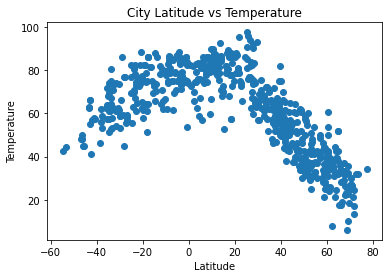

In this plot, the code analyzed temperature relative to latitudes.  This proves weather near the 0 latitude has higher temperatures


In [148]:
# Plotting the data: Lat vs Temp

x_values = clean_weather_df['Latitudes']
y_values = clean_weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('City Latitude vs Temperature')
plt.show()

print( 'In this plot, the code analyzed temperature relative to latitudes.  This proves weather near the 0 latitude has higher temperatures')

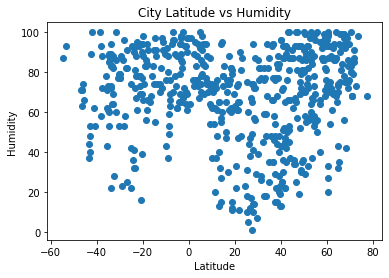

In this plot, the code analyzed humidity relative to latitudes. This proves weather near the 20 - 30 latitude have the lowest humidity


In [173]:
# Plotting the data: Lat vs Humidity

x_values = clean_weather_df['Latitudes']
y_values = clean_weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.show()

print('In this plot, the code analyzed humidity relative to latitudes.'\
      ' This proves weather near the 20 - 30 latitude have the lowest humidity')

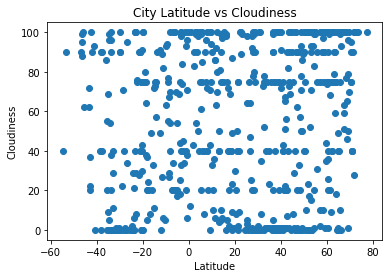

In this plot, the code analyzed cloudiness relative to latitudes.  This proves cities at least 20 degrees of latitude away from the equator have more clear skies.


In [175]:
# Plotting the data: Lat vs Cloudiness

x_values = clean_weather_df['Latitudes']
y_values = clean_weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')
plt.show()

print( 'In this plot, the code analyzed cloudiness relative to latitudes.'\
      '  This proves cities at least 20 degrees of latitude away from the equator have more clear skies.')

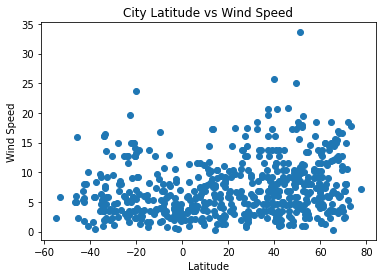

In this plot, the code analyzed wind speed relative to latitudes.  This proves wind speed get are lowest around 0 degrees and peaks at -20 and 50 degrees away


In [177]:
# Plotting the data: Lat vs Wind Speed

x_values = clean_weather_df['Latitudes']
y_values = clean_weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')

plt.show()

print( 'In this plot, the code analyzed wind speed relative to latitudes.'\
     '  This proves wind speed get are lowest around 0 degrees and peaks at -20 and 50 degrees away')

In [152]:
# Breaking up the clean data by hemisphere: northern and southern

north_clean_weather_df = clean_weather_df.drop(clean_weather_df[clean_weather_df.Latitudes <=0].index)

south_clean_weather_df = clean_weather_df.drop(clean_weather_df[clean_weather_df.Latitudes >=0].index)

# repurposed this code for inspirations - clean_weather_df = weather_df.drop(weather_df[weather_df.Humidity > 100].index)


In [153]:
# Perform a linear regression on northern temperature vs. latitude
from scipy import stats
x_values = north_clean_weather_df['Latitudes']
y_values = north_clean_weather_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      84.597976
6      72.755860
7      81.690053
14     53.065018
15     42.349131
         ...    
585    68.113529
586    43.497462
590    53.875200
591    42.240340
592    69.490947
Name: Latitudes, Length: 413, dtype: float64


In [154]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.91x +91.65


The r-value is: 0.775922161137025


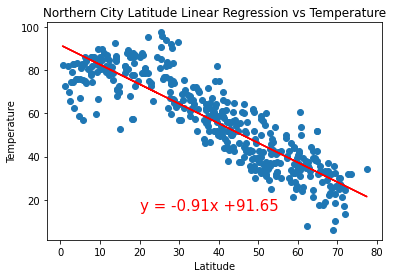

In [155]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Northern City Latitude Linear Regression vs Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.4651472007185839


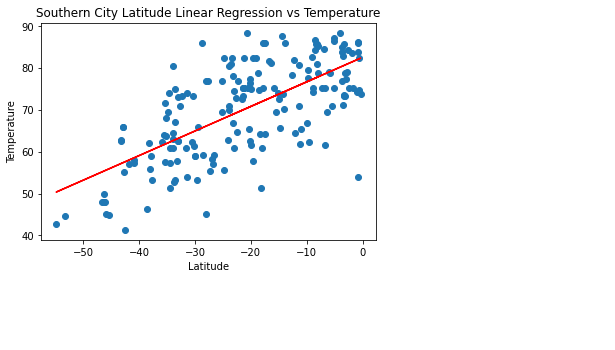

In [156]:
x_values = south_clean_weather_df['Latitudes']
y_values = south_clean_weather_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title('Southern City Latitude Linear Regression vs Temperature')

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()



The r-value is: 0.03865478486662387


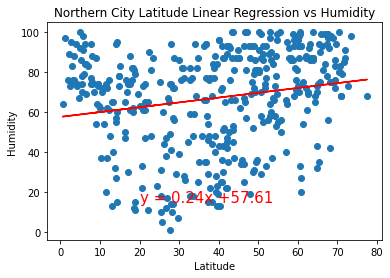

In [157]:
x_values = north_clean_weather_df['Latitudes']
y_values = north_clean_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Northern City Latitude Linear Regression vs Humidity')

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.03681461476395354


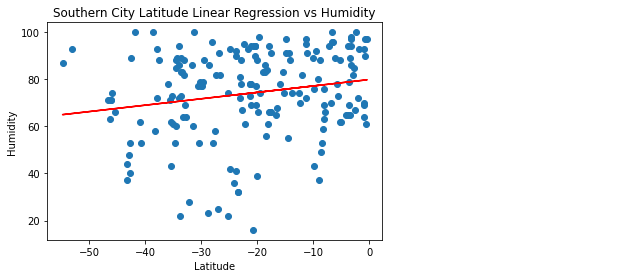

In [158]:
x_values = south_clean_weather_df['Latitudes']
y_values = south_clean_weather_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Southern City Latitude Linear Regression vs Humidity')

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.008611822307535814


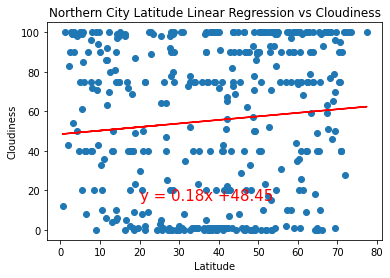

In [159]:
x_values = north_clean_weather_df['Latitudes']
y_values = north_clean_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern City Latitude Linear Regression vs Cloudiness')

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.007880055045609726


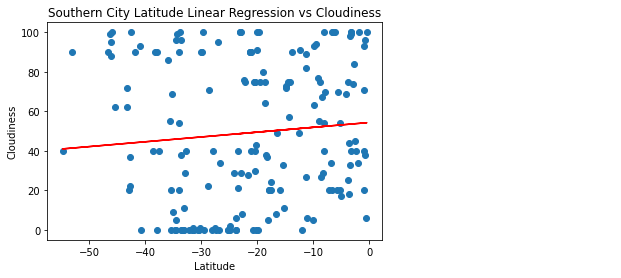

In [160]:
x_values = south_clean_weather_df['Latitudes']
y_values = south_clean_weather_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern City Latitude Linear Regression vs Cloudiness')

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.04237651914881067


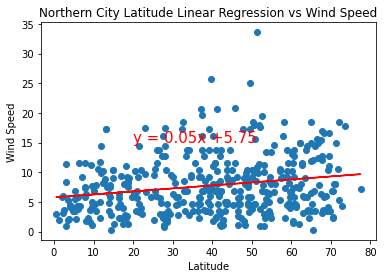

In [161]:
x_values = north_clean_weather_df['Latitudes']
y_values = north_clean_weather_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern City Latitude Linear Regression vs Wind Speed')

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.009309933649668837


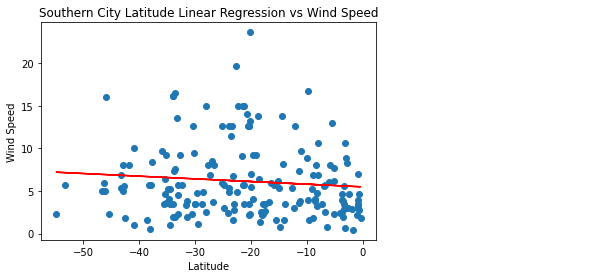

In [162]:
x_values = south_clean_weather_df['Latitudes']
y_values = south_clean_weather_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern City Latitude Linear Regression vs Wind Speed')

plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()